In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from razdel import sentenize, tokenize
import itertools
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from laserembeddings import Laser
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
from slovnet import Morph
from navec import Navec

In [3]:
model_checkpoint = 'cointegrated/rubert-base-cased-nli-threeway'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
if torch.cuda.is_available():
    model.cuda()

H:\Anaconda\envs\transformers\lib\site-packages\transformers\configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "


In [4]:
laser = Laser()

In [5]:
SentimentTokenizer = RegexTokenizer()
SentimentModel = FastTextSocialNetworkModel(tokenizer=SentimentTokenizer)

In [6]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
morph = Morph.load('slovnet_morph_news_v1.tar', batch_size=4)
morph.navec(navec)

Morph(
    infer=MorphInfer(
        model=Morph(
            emb=WordShapeEmbedding(
                word=NavecEmbedding(
                    id='news_v1_1B_250K_300d_100q',
                    indexes=Weight(
                        shape=[250002,
                         100],
                        dtype='uint8',
                        array=array([[176, 222, 248, ..., 244, 183, 191],
                               [215, 200, 168, ..., 120, 217,  21],
                               [ 83, 174,  54, ..., 106,  88, 251],
                               ...,
                               [133, 125, 123, ..., 124,  94,  24],
                               [183,  49, 180, ..., 151, 167,  68],
                               [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
                    ),
                    codes=Weight(
                        shape=[100,
                         256,
                         3],
                        dtype='float32',
                       

In [7]:
#text = "Фестиваль национальных культур – самое яркое событие осени для студентов Технологического университета им. А.А. Леонова. И в этом году у него первый мини-юбилей! Пять лет как фестиваль является традиционным праздником нашего вуза и на несколько недель захватывает внимание студентов. Они активно и с энтузиазмом готовят свои выступления, продумывают сценарии и репетируют, оттачивая своё мастерство. Отличительными чертами Фестиваля национальных культур за годы его проведения стали визитные карточки разных государств, творческие номера и дегустация блюд национальной кухни. Часто именно иностранные студенты представляют свою Родину, но к процессу обязательно подключаются и другие ребята. Благодаря такому подходу студенты ещё на этапе подготовки к фестивалю погружаются в национальную культуру многих стран и делятся друг с другом своим опытом. В связи с эпидемиологической ситуацией в этом году не получилось накрыть стол с национальными блюдами, но это не помешало празднику раскрыться во всей красе через яркие информативные презентации и эффектные выступления студентов. Мероприятие прошло с соблюдением всех необходимых мер безопасности, вход осуществлялся по QR-кодам, а все желающие могли присоединиться к трансляции онлайн. В конце участники были награждены грамотами. Проректор по внеучебной и воспитательной работе Вера Минакова поблагодарила всех ребят за тот вклад, что они внесли в организацию такого яркого праздника, и отметила, что гости зарядились невероятной энергией от выступающих."
#text = "Минтранс предложил оснастить автомобили сервисов такси устройствами для контроля сонливости водителей. Об этом говорится в проекте федерального закона «О такси», размещённого на сайте проектов нормативно-правовых актов. Законопроект предусматривает, чтобы кузов такси окрашивали по схеме из квадратов контрастных цветов в шахматном порядке. При этом цветовая гамма должна «соответствовать стандартам региона». На крыше автомобиля необходимо размещать опознавательный фонарь оранжевого цвета. Если проект примут, он вступит в силу 1 сентября 2022 года. Действующие ПДД разрешают водителю находиться за рулём суммарно не более десяти часов. Контролируют это с помощью тахографов. Штраф для нарушителей — до 2,5 тысяч рублей."
#text = "Сегодня в Технологическом университете им. А.А. Леонова состоялась встреча представителей компании «Первый Бит» с преподавателями вуза и студентами IT-направлений подготовки. Эта встреча – не первая. Ранее студенты уже познакомились с деятельностью компании «Первый Бит». Теперь же молодые люди узнали о возможностях трудоустройства и прохождения практики в организации. Компания заинтересована в молодых и перспективных сотрудниках. Поэтому специально для студентов её руководство разработало особые условия трудоустройства. Ребятам предлагается устроиться на работу в «Первый Бит» на вакансии с частичной занятостью, что позволит совмещать трудовую деятельность с учёбой. При успешном трудоустройстве, студенты пройдут в компании необходимое оплачиваемое обучение. Являясь сотрудниками «Первого Бита», ребята также смогут работать над своими курсовыми и дипломными проектами по тематике компании под руководством её специалистов. Многих из присутствовавших на встрече студентов заинтересовали такие перспективы, и представители «Первого Бита» сразу же предложили им пройти необходимое для трудоустройства тестирование. А остальных ребят, кто ещё не принял решение, компания с нетерпением будет ждать в своём офисе в Москве. Напомним, компания «Первый Бит» давно известна на рынке информационных услуг по автоматизации процессов учёта и управления на базе 1С. Партнёрами компании являются крупнейшие корпорации и предприятия России и ближнего зарубежья."
#text = "Разработчик Pokemon Go привлёк $300 млн для развития платформы дополненной реальности на основе карты мира. За два года оценка компании выросла с $4 млрд до $9 млрд. Niantic привлекла инвестиции от хедж-фонда Coatue. Она потратит деньги на развитие уже запущенных игр и новые приложения, расширение платформы для разработчиков Lightship и развитие «метавселенной» на основе трехмерной карты мира. Компания запустила платформу для разработчиков Lightship в октябре 2021 года. Через неё можно пользоваться инструментами для разработки и запуска приложений для дополненной реальности. Тогда же компания объявила о запуске фонда на $20 млрд для AR-стартапов. В 2016 году Niantic запустила игру в дополненной реальности Pokemon Go. За пять выручка от игры превысила $5 млрд, а общее количество загрузок — 632 млн, по данным SensorTower. Компания работает над приложением с дополненной реальностью Indgress, а в январе 2022 года закроет Harry Potter: Wizards Unite. Niantic была частью Alphabet, но отделилась после реструктуризации компании в 2015 году. В 2019 году стартап привлёк $245 млн с оценкой в $4 млрд."

# https://zen.yandex.ru/media/id/5c4825ee78e51100ad620ff3/zemlia-pokryta-kupolom-5d1be15229063700add517a8?&
text = "Официальная наука не отрицает, что на раннем этапе развития планеты, наша земля могла быть покрыта каким то куполом. В том числе, коркой льда, лёд мог растаять и упасть за землю в форме осадков, образуя глобальный потоп, тем временем исследователи утверждают, купол над нами есть и сейчас. Очень многие эзотерики считают, что верхняя крышка мира является эфиром, то есть тонкий газ, который по сути то существует, то нет. Но другая половина сторонников считает, что купол алмазный, тк выполнен из очень плотного углерода. Основываясь на то, что углерод, при очень высоких температурах и большом давлении, формирует как раз-алмаз. Как же сохраняет форму алмазный купол земли? Одна молекула кислорода в разных уровнях пространства, представляет собой -воду, кислород и озон. Кислород которым мы дышим на земле, поднимаясь все выше, соединяется с элементами атмосферы от водорода до озона, при минусовой температуре в космосе, он может находиться только в виде льда, но во что кислород может трансформироваться дальше? Озон там находится в жидком состоянии, потому что при такой температуре он может находиться только в жидком состоянии, соответсвенно дальше уже поднимается 4 молекулы кислорода, а это уже практически твёрдое тело, и вот это то самое что является основой и что держит сверху крышку нашего купола. И вот какие ещё аргументы имеют сторонники алмазно-водЯного купола- промышленные разработки человечества, вырубка лесов, Приводит к снижению уровня кислорода в атмосфере, образуется углекислый газ, который поднимаясь вверх- разрушает оболочку купола. Слои кислорода начинают двигаться, природа чтобы компенсировать это начинает топить ледники, Но, это мы действительно наблюдаем сейчас, только нам говорят это глобальное потепление. Соответсвенно мы видим что? Небо начинает падать, как в библии сказано, что небо падает на землю, сейчас все люди чувствуют пониженное давление, у нас идут сбои в электротехнических приборах, почему ? Потому что слои кислорода начали двигаться. Процесс таяния ледников, абсолютно химически обоснованный и неизбежный, исследования учёных подтверждают, что ледники тают с огромной скоростью, Что же происходит с куполом? Он начинает падать, его опора разрушается, И это, ещё одно объяснение -появление загадочных облаков И звуков в небе. Если теоретически, земля окружена куполом из твёрдой алмазной структуры, то он может скрипеть и ломаться, это возможно и есть тот самый небесный скрежет. Но, что ещё более невероятно, похоже его кто-то чинит. Вспомните огромное количество роликов, будто кто то латает дыру прячась за облаками."

In [8]:
sentences = []
chunk = []
for sent in sentenize(text):
    sentence = {}
    sentence['Sentence'] = sent.text
    sentence['Span'] = (sent.start, sent.stop)
    sentences.append(sentence)
    tokens = [_.text for _ in tokenize(sent.text)]
    chunk.append(tokens)
result = pd.DataFrame(sentences)

In [11]:
result['Len'] = result['Sentence'].str.len()

In [12]:
result

,Sentence,Span,Len
0,"Официальная наука не отрицает, что на раннем э...","(0, 116)",116
1,"В том числе, коркой льда, лёд мог растаять и у...","(117, 289)",172
2,"Очень многие эзотерики считают, что верхняя кр...","(290, 421)",131
3,"Но другая половина сторонников считает, что ку...","(422, 521)",99
4,"Основываясь на то, что углерод, при очень высо...","(522, 629)",107
5,Как же сохраняет форму алмазный купол земли?,"(630, 674)",44
6,Одна молекула кислорода в разных уровнях прост...,"(675, 772)",97
7,"Кислород которым мы дышим на земле, поднимаясь...","(773, 1015)",242
8,"Озон там находится в жидком состоянии, потому ...","(1016, 1311)",295
9,И вот какие ещё аргументы имеют сторонники алм...,"(1312, 1562)",250


In [ ]:
columns = ['Sentence', 'Prev text', 'Entailment', 'Contradiction', 'Neutrality']
result2 = pd.DataFrame(columns=columns)

for sentence in tqdm(sentences):
    prev_text = ''
    for prev_sentence in sentences[:sentences.index(sentence)]:
        prev_text += prev_sentence['Sentence']
    
    with torch.inference_mode():
        print(len(tokenizer(prev_text, sentence['Sentence'])['input_ids']))
        out = model(**tokenizer(prev_text, sentence['Sentence'], return_tensors='pt').to(model.device))
        proba = torch.softmax(out.logits, -1).cpu().numpy()[0]
    analysis = {v: proba[k] for k, v in model.config.id2label.items()}
    
    new_df = pd.DataFrame([
        [sentence['Sentence'], 
         prev_text, 
         analysis['entailment'], 
         analysis['contradiction'], 
         analysis['neutral']
        ]], columns = columns)
    result2 = result2.append(new_df)

result2 = result2.reset_index(drop=True)

  0%|          | 0/19 [00:00<?, ?it/s]

24


  5%|▌         | 1/19 [00:00<00:06,  2.63it/s]

65


 11%|█         | 2/19 [00:00<00:08,  2.06it/s]

97


 16%|█▌        | 3/19 [00:01<00:10,  1.49it/s]

116


 21%|██        | 4/19 [00:02<00:11,  1.31it/s]

137


 26%|██▋       | 5/19 [00:03<00:12,  1.12it/s]

147


 32%|███▏      | 6/19 [00:04<00:12,  1.05it/s]

166


 37%|███▋      | 7/19 [00:06<00:13,  1.17s/it]

214


 42%|████▏     | 8/19 [00:08<00:15,  1.42s/it]

271


 47%|████▋     | 9/19 [00:10<00:16,  1.62s/it]

316


 53%|█████▎    | 10/19 [00:13<00:16,  1.88s/it]

348


 58%|█████▊    | 11/19 [00:16<00:17,  2.23s/it]

355


 63%|██████▎   | 12/19 [00:18<00:16,  2.42s/it]

392


 68%|██████▊   | 13/19 [00:22<00:17,  2.85s/it]

399


 74%|███████▎  | 14/19 [00:26<00:15,  3.13s/it]

433


 79%|███████▉  | 15/19 [00:30<00:13,  3.46s/it]

456


 84%|████████▍ | 16/19 [00:34<00:10,  3.65s/it]

494


In [14]:
del result2['Prev text']

In [15]:
result2['MaxLogic'] = result2[['Entailment','Contradiction','Neutrality']].idxmax(axis=1)

In [16]:
sentiments = SentimentModel.predict(result['Sentence'])

In [17]:
result2 = result2.join(pd.DataFrame(sentiments))

In [18]:
result2['MaxSentiment'] = result2[['skip','negative','positive', 'speech']].idxmax(axis=1)

In [19]:
result2

,Sentence,Entailment,Contradiction,Neutrality,MaxLogic,negative,neutral,skip,positive,speech,MaxSentiment
0,"Официальная наука не отрицает, что на раннем э...",0.026792,0.039331,0.933877,Neutrality,0.307368,0.294225,0.177821,0.061886,0.001878,negative
1,"В том числе, коркой льда, лёд мог растаять и у...",0.001029,0.006143,0.992827,Neutrality,0.262852,0.615098,0.177821,0.014514,0.025967,negative
2,"Очень многие эзотерики считают, что верхняя кр...",0.016024,0.490625,0.493351,Neutrality,0.294225,0.705795,0.112805,0.040856,0.001608,negative
3,"Но другая половина сторонников считает, что ку...",0.002631,0.009261,0.988108,Neutrality,0.115971,0.877487,0.036230,0.022987,0.003717,negative
4,"Основываясь на то, что углерод, при очень высо...",0.273114,0.048573,0.678313,Neutrality,0.228166,0.453272,0.060097,0.087574,0.042098,negative
5,Как же сохраняет форму алмазный купол земли?,0.162154,0.044853,0.792993,Neutrality,0.228166,0.887215,0.196836,0.000468,0.000513,negative
6,Одна молекула кислорода в разных уровнях прост...,0.081216,0.697246,0.221537,Contradiction,0.314061,0.665421,0.085109,0.056662,0.006108,negative
7,"Кислород которым мы дышим на земле, поднимаясь...",0.657713,0.017545,0.324741,Entailment,0.222710,0.377551,0.250923,0.129413,0.004765,skip
8,"Озон там находится в жидком состоянии, потому ...",0.460536,0.441006,0.098458,Entailment,0.275140,0.468801,0.112805,0.082707,0.004915,negative
9,И вот какие ещё аргументы имеют сторонники алм...,0.188981,0.373302,0.437717,Neutrality,0.191943,0.777310,0.112805,0.046044,0.006914,negative


In [20]:
words_statistic = []

for markup in morph.map(chunk):
    words = []
    for token in markup.tokens:
        words.append({'word':token.text, 'tag':token.tag})
    df_words = pd.DataFrame(words)
    df_words['part'] = df_words['tag'].str.replace('\|.*', '', regex=True)
    del df_words['word']
    del df_words['tag']
    df_words['count'] = 1
    words_statistic.append(df_words.groupby('part').sum()['count'].to_dict())

result3 = pd.DataFrame(words_statistic).fillna(0)
result3

,ADJ,ADP,AUX,DET,NOUN,PART,PUNCT,SCONJ,VERB,ADV,CCONJ,PRON,NUM,PROPN
0,2.0,1.0,1.0,2.0,6.0,1.0,3,2.0,3,0.0,0.0,0.0,0.0,0.0
1,1.0,4.0,0.0,2.0,11.0,1.0,6,0.0,6,1.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.0,0.0,6.0,0.0,5,2.0,5,1.0,0.0,3.0,0.0,0.0
3,3.0,1.0,0.0,0.0,5.0,0.0,3,1.0,2,1.0,1.0,0.0,0.0,0.0
4,3.0,2.0,0.0,0.0,3.0,0.0,4,2.0,2,1.0,1.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,3.0,1.0,1,0.0,1,1.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,6.0,0.0,4,0.0,1,0.0,1.0,1.0,1.0,0.0
7,1.0,8.0,0.0,0.0,10.0,2.0,6,0.0,7,2.0,1.0,4.0,0.0,1.0
8,4.0,3.0,0.0,3.0,9.0,2.0,5,2.0,6,8.0,3.0,4.0,1.0,1.0
9,2.0,2.0,0.0,1.0,14.0,1.0,5,0.0,6,2.0,1.0,1.0,0.0,0.0


In [24]:
embeddings = laser.embed_sentences(result['Sentence'][:11], lang='ru')

In [25]:
pca=PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
pca_df = pd.DataFrame(pca_result, columns=['x', 'y'])

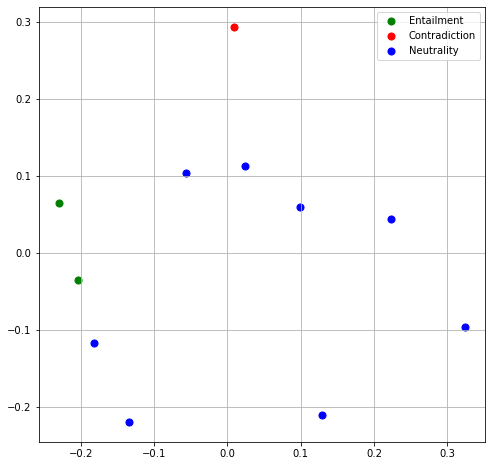

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Entailment', 'Contradiction', 'Neutrality']
colors = ['g', 'r', 'b']
markers = ['o', 'o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = result2['MaxLogic'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 50
               , marker = marker
              )
ax.legend(targets)
ax.grid()

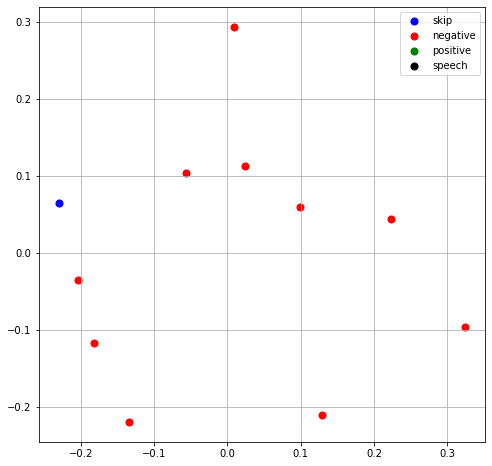

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['skip','negative','positive', 'speech']
colors = ['b', 'r', 'g', 'k']
markers = ['o', 'o', 'o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = result2['MaxSentiment'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 50
               , marker = marker
              )
ax.legend(targets)
ax.grid()